# Introdução

Este notebook tem como objetivo cruzar dados de desmatamento (PRODES/INPE) com indicadores socioeconômicos (IBGE)
para os cinco municípios do Sudeste Paraense: Marabá, Parauapebas, Eldorado do Carajás, São Félix do Xingu e Tucumã. A análise considera os anos 2010, 2021 e 2022, focando na correlação entre desmatamento e fatores como PIB per capita.

# Importações

In [33]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dicionário

In [34]:
municipios_ids = {
    1504208: 'Marabá',
    1505537: 'Parauapebas',
    1502954: 'Eldorado do Carajás',
    1507301: 'São Félix do Xingu',
    1508051: 'Tucumã'
}

# Upload PRODES

In [35]:
def carregar_dados_prodes():
    print("🔽 Faça upload do arquivo: dados_prodes_sudeste_paraense_2010_2021_2022.csv")
    uploaded = files.upload()
    for filename in uploaded.keys():
        df = pd.read_csv(filename)
    df['id_municipio'] = pd.to_numeric(df['id_municipio'], errors='coerce')
    df['nome'] = df['id_municipio'].map(municipios_ids)
    return df[df['nome'].notna()].copy()

Upload do arquivo de desmatamento PRODES
 O arquivo deve conter as colunas: id_municipio, ano, area_desmatada, area_vegetacao
 (arquivo: dados_prodes_sudeste_paraense_2010_2021_2022.csv)

# Upload IBGE

In [36]:
def carregar_socioeconomico():
    print("🔽 Faça upload do arquivo: socioeconomico_sudeste_paraense.csv")
    uploaded = files.upload()
    for filename in uploaded.keys():
        df = pd.read_csv(filename)
    df['id_municipio'] = pd.to_numeric(df['id_municipio'], errors='coerce')
    df['nome'] = df['id_municipio'].map(municipios_ids)
    return df[df['nome'].notna()].copy()

Upload do arquivo de dados socioeconômicos já limpo
O arquivo deve conter as colunas: id_municipio, PIB per capita, IDHM, etc.
(arquivo: socioeconomico_sudeste_paraense.csv)

# Carregamento

1. Carregamento e junção dos dados

In [37]:
prodes_df = carregar_dados_prodes()
socio_df = carregar_socioeconomico()
merged_df = pd.merge(prodes_df, socio_df, on='nome', how='inner')

🔽 Faça upload do arquivo: dados_prodes_sudeste_paraense_2010_2021_2022.csv


Saving dados_prodes_sudeste_paraense_2010_2021_2022.csv to dados_prodes_sudeste_paraense_2010_2021_2022 (8).csv
🔽 Faça upload do arquivo: socioeconomico_sudeste_paraense.csv


Saving socioeconomico_sudeste_paraense.csv to socioeconomico_sudeste_paraense (4).csv


# Exploração inicial

2. Análise exploratória e tratamento

In [38]:
print("\n✅ Dados combinados (5 primeiras linhas):")
print(merged_df[['nome', 'ano', 'area_desmatada', 'area_vegetacao']].head())
print("\n📏 Verificando valores ausentes:")
print(merged_df.isnull().sum())


✅ Dados combinados (5 primeiras linhas):
          nome   ano  area_desmatada  area_vegetacao
0       Marabá  2010            6536          806236
1       Marabá  2021            8973         1113816
2       Marabá  2022            5472         1085171
3  Parauapebas  2010            7877          721250
4  Parauapebas  2021            5926          885359

📏 Verificando valores ausentes:
id_municipio_x                 0
nome                           0
ano                            0
area_desmatada                 0
area_vegetacao                 0
id_municipio_y                 0
PIB per capita - R$ [2021]     0
IDHM [2010]                    0
População estimada [2024]      0
Mortalidade infantil [2022]    0
dtype: int64


Conversão de variáveis numéricas

In [39]:
socio_df['PIB'] = pd.to_numeric(socio_df['PIB per capita - R$ [2021]'].str.replace(',', '.'), errors='coerce')


# Gráficos interativos

 Dashboard Interativo com Plotly

In [40]:
fig1 = px.line(prodes_df, x='ano', y='area_desmatada', color='nome', markers=True,
               title='Tendência de Desmatamento por Município (Plotly)')
fig1.show()

fig2 = px.scatter(dados_corr, x='PIB', y='area_desmatada', color='nome', size='area_desmatada',
                  hover_name='nome', title='Correlação entre PIB per capita e Área Desmatada (Plotly)')
fig2.show()

⚠️ Esses gráficos são interativos, mas não serão exportados corretamente se o notebook for salvo em PDF. Para uso em PDF, mantenha os gráficos estáticos abaixo com matplotlib/seaborn.

# Gráficos estáticos

Tendência de desmatamento por município

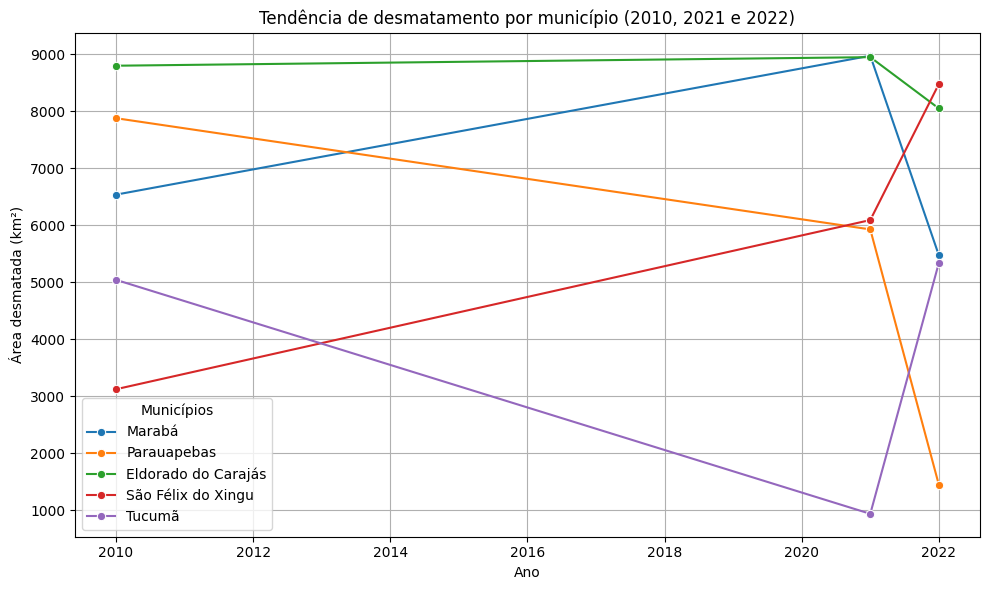

In [41]:
plt.figure(figsize=(10,6))
sns.lineplot(data=prodes_df, x='ano', y='area_desmatada', hue='nome', marker='o')
plt.title("Tendência de desmatamento por município (2010, 2021 e 2022)")
plt.ylabel("Área desmatada (km²)")
plt.xlabel("Ano")
plt.grid(True)
plt.legend(title="Municípios")
plt.tight_layout()
plt.show()

Este gráfico mostra como a área desmatada variou nos anos disponíveis para cada município.
Padrões de crescimento ou queda ao longo dos anos ajudam a visualizar o comportamento regional.

Correlação entre PIB per capita e área desmatada

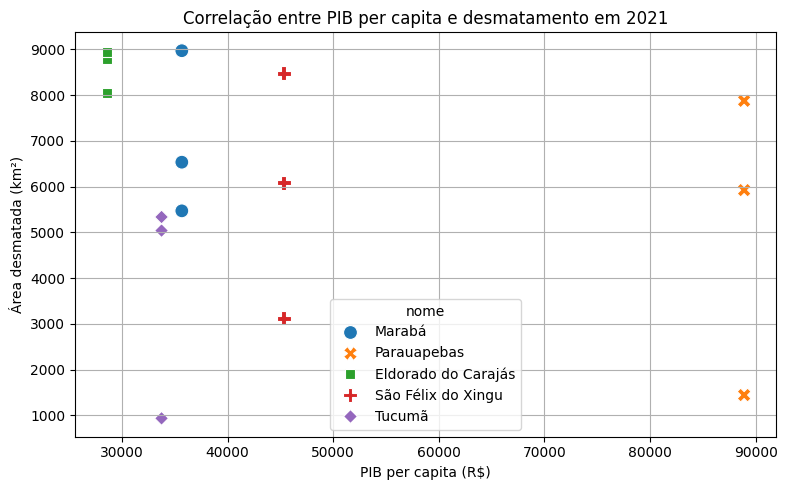

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=dados_corr, x='PIB', y='area_desmatada', hue='nome', style='nome', s=100)
plt.title("Correlação entre PIB per capita e desmatamento em 2021")
plt.xlabel("PIB per capita (R$)")
plt.ylabel("Área desmatada (km²)")
plt.grid(True)
plt.tight_layout()
plt.show()

📌 Observação:
Este gráfico ajuda a visualizar se municípios com maior PIB apresentam mais ou menos desmatamento.
A ausência de uma tendência clara pode indicar que outros fatores influenciam a devastação da vegetação.


# Conclusão

Os gráficos permitem observar padrões como municípios com maior desmatamento recorrente e aqueles que, mesmo com PIB elevado, ainda apresentam índices altos de supressão vegetal.Para fins do desafio, esta análise inicial oferece base para hipóteses sobre a relação entre
atividade econômica e pressão ambiental.
O notebook será enviado via repositório Github e complementado com um relatório em PDF com a descrição detalhada da metodologia, dados utilizados e insights gerados.